In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track
                             )

In [2]:
# path_save = "D:/OneDrive - University of Warwick/06-KineticAnalysisMounia/4-Figures"
path_save = "/home/u2175049/Documents/Code/KineticAnalysis/notebook/figures/"

In [3]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

In [9]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
for i in range(100):
    x_global, y_global, y_start_prot = generate_track(prot_length = prot_length, 
                                                      suntag_appearance=24, 
                                                      fluo_max_ref=32, 
                                                      fluo_max=128, 
                                                      translation_rate=24, 
                                                      binding_rate=0.05,
                                                      step = 0.1,
                                                      length=82000)
    if i == 0:
        datas = pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })
    else:
        datas = pd.concat([datas, 
                           pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })], ignore_index=True)
datas.to_csv("datas_test_dt_length.csv")

In [4]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
datas = pd.read_csv("datas_test_dt_length.csv")

In [5]:
first = True
for t in [1, 10, 600]:
    dt = t*0.1
    for length_track in [50, 100, 150, 200, 500, 1000, 5000, 10000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1:
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)

to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear

to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
n

not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
n

not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
n

In [6]:
for t in [1, 10, 600]:
    dt = t*0.1
    for length_track in [20000, 50000]:
        
        for i in range(100):
            datas2 = datas[datas["TRACK_ID"]==i][::t][:length_track]
            if len(np.unique(datas2["MEAN_INTENSITY_CH1"])) > 1:
                (x, 
                y, 
                x_auto, 
                y_auto, 
                elongation_r, 
                translation_init_r,
                perr) = single_track_analysis(datas2, 
                                             i, 
                                             delta_t = dt,
                                             protein_size=prot_length,
                                             normalise_intensity=1,
                                             normalize_auto=True,
                                             mm=None,
                                             lowpass_=False,
                                             cutoff=100,
                                             rtol=1e-1,
                                             method="linear",
                                             force_analysis=True,
                                             first_dot=True)
                if first:
                    results = pd.DataFrame({"elongation_r":elongation_r, 
                                            "init_translation_r":translation_init_r, 
                                            "dt":dt,
                                            "long_track":datas2.shape[0],
                                           "id":i},
                                          index=[0])
                    first = False
                
                else:
                    results = pd.concat([results, 
                                    pd.DataFrame({"elongation_r":elongation_r, 
                                                  "init_translation_r":translation_init_r, 
                                                  "dt":dt, 
                                                  "long_track":datas2.shape[0],
                                                  "id":i}, index=[0])
                                    ], ignore_index=True)

to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear

not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
n

In [7]:
results.groupby(by=['dt', 'long_track'])[['elongation_r','init_translation_r']].mean()

elongation_r  init_translation_r
dt   long_track                                  
0.1  50            326.878491        22858.783628
     100           180.496149        29247.276938
     150           143.771810           16.275561
     200           110.103275            3.161915
     500            57.521059            0.759763
     1000           35.493403            0.245301
     5000           23.140240            0.050583
     10000          21.404515            0.040952
     20000          20.972843            0.039701
     50000          20.358782            0.038286
1.0  50             56.018340            0.698843
     100            35.485560            0.246125
     150            29.627066            0.109909
     200            26.385499            0.077525
     500            22.828270            0.049968
     1000           21.047336            0.040352
     5000           20.141473            0.037841
     10000          20.184544            0.037959
     20000          20.131434            0.037602
     50000          20.108537            0.037697
60.0 50              3.749950           -0.482245
     100             3.914789           -0.472023
     150             4.142456           -0.441503
     200             4.251056           -0.451571
     500             2.915289           -0.583666
     1000            3.070361           -0.563418
     1364            3.185667           -0.563247

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


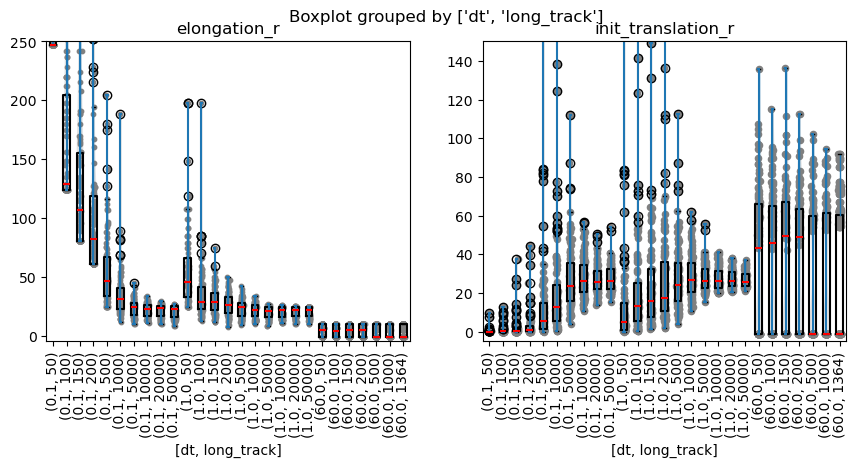

In [11]:
fig, ax = plt.subplots(1,2)
# results["init_translation_r"] = 1/results["init_translation_r"]
results.boxplot(['elongation_r'] , 
               by=['dt', 'long_track'], 
               grid=False, 
               ax = ax[0],
               rot=90, 
                boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
              )

50,100,150, 200, 500
violin = ax[0].violinplot(dataset = [
    results[(results.dt == 0.1) & (results.long_track == 50)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 100)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 150)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 200)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 500)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 1000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 5000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 10000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 20000)]["elongation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 50000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 100)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 150)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 200)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 500)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 1000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 5000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 10000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 20000)]["elongation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50000)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500)]["elongation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000)]["elongation_r"].values,
    
    ])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

results.boxplot(['init_translation_r'] , 
               by=['dt', "long_track"], 
               grid=False, 
               ax = ax[1],
               rot=90,
               boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
               )


violin = ax[1].violinplot(dataset = [
    results[(results.dt == 0.1) & (results.long_track == 50)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 100)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 150)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 200)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 500)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 1000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 5000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 10000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 20000)]["init_translation_r"].values,
    results[(results.dt == 0.1) & (results.long_track == 50000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 100)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 150)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 200)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 500)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 1000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 5000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 10000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 20000)]["init_translation_r"].values,
    results[(results.dt == 1.0) & (results.long_track == 50000)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 50)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 100)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 150)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 200)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 500)]["init_translation_r"].values,
    results[(results.dt == 60.0) & (results.long_track == 1000)]["init_translation_r"].values,
    
                           ])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

group = ['dt', "long_track"]
column = 'elongation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = ['dt', "long_track"]
column = 'init_translation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
    
ax[0].set_ylim(-5,250)
ax[1].set_ylim(-5, 150)
fig.set_size_inches((10,4))
fig.savefig(os.path.join(path_save, "results_delta_t_length_boxplot_linear_diff.eps"), dpi=300)